In [1]:
import cv2
import os
import sys
from datetime import datetime
from ultralytics import YOLO
import matplotlib.pyplot as plt

cwd = os.getcwd()
delimiter = "\\" if "\\" in cwd else "/"
repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
sys.path.append(repoPath + "dataImport/")
import vidUtils
from vidUtils import getFrame, getCap
import rwWorkingTSDf
from rwWorkingTSDf import readWorkingTSDF

In [2]:
model = YOLO("yolo11n-pose.pt")

100%|██████████| 5.97M/5.97M [00:00<00:00, 19.3MB/s]


read in 30466 rows from 1 files, retruning 30466 rows


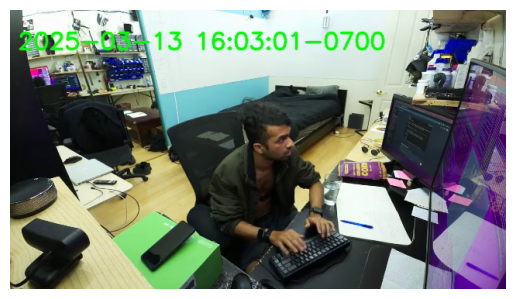

In [3]:
deviceDescriptor = ["abhik", "bedroompi", "abhik", "piCam-raspberryPi5-Camv3120", "mp4", "piVidCap"]

# find some timestamps
vidDf = readWorkingTSDF(*deviceDescriptor)
idx = 10
videoIndex = vidDf.iloc[idx]['videoIndex']
videoStartTime = vidDf.iloc[idx]['videoStartTime']
videoEndTime = vidDf.iloc[idx]['videoEndTime']
frame = getFrame(deviceDescriptor, videoStartTime, videoEndTime, videoIndex)
dispframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper color display

# Display using matplotlib
plt.imshow(dispframe)
plt.axis('off')  # Hide axes
plt.show()

In [5]:
o = model(frame)


0: 384x640 1 person, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


In [19]:
o[0].keypoints.xy[0][0]

tensor([362.9376, 171.3796], device='cuda:0')

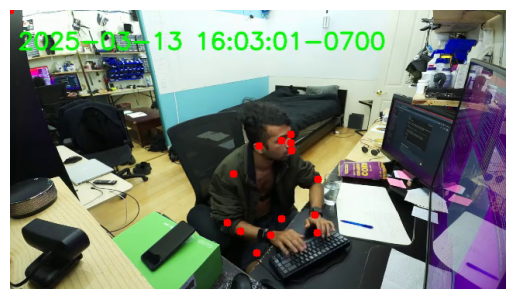

In [20]:
for x, y in o[0].keypoints.xy[0]:
    cv2.circle(dispframe, (int(x), int(y)), 5, (255, 0, 0), -1)  # Draw keypoints as circles
plt.imshow(dispframe)
plt.axis('off')  # Hide axes
plt.show()

In [23]:
o[0].plot()

array([[[109, 118,  99],
        [109, 118,  99],
        [109, 118,  99],
        ...,
        [ 43,  87,  80],
        [ 52,  86,  81],
        [ 49,  83,  78]],

       [[108, 117,  98],
        [108, 117,  98],
        [108, 117,  98],
        ...,
        [ 41,  85,  78],
        [ 49,  83,  78],
        [ 47,  81,  76]],

       [[107, 116,  97],
        [107, 116,  97],
        [107, 116,  97],
        ...,
        [ 33,  69,  64],
        [ 28,  60,  55],
        [ 33,  65,  60]],

       ...,

       [[ 57,  92,  89],
        [ 51,  86,  83],
        [ 83, 102, 101],
        ...,
        [ 88,   0,  53],
        [ 88,   0,  53],
        [ 88,   0,  53]],

       [[ 80, 112, 117],
        [ 50,  82,  87],
        [ 52,  94,  97],
        ...,
        [ 88,   0,  53],
        [ 88,   0,  53],
        [ 88,   0,  53]],

       [[ 97, 129, 134],
        [ 73, 105, 110],
        [ 46,  88,  91],
        ...,
        [ 88,   0,  53],
        [ 88,   0,  53],
        [ 88,   0,  53]]